In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.measure import find_contours

In [2]:
image = cv2.imread('/mnt/e/Term 4/HW/DIP-HW9/data/Images/chromosome.tif', cv2.IMREAD_GRAYSCALE)
image = image / 255

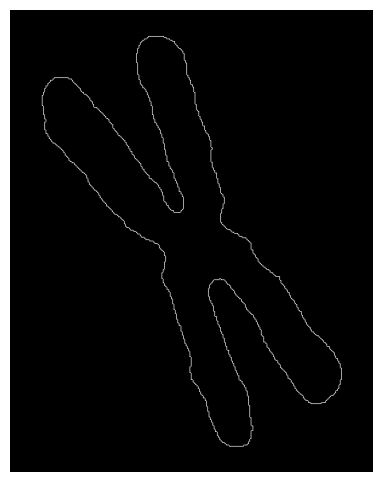

Shape of image is: (727, 570)


In [3]:
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='grey')
plt.axis('off')
plt.show()

print(f'Shape of image is: {image.shape}')

In [5]:
contours = find_contours(image=image, level=0.5)
contours = contours[0]
contours.shape

(57, 2)

In [16]:
image_uint8 = (image * 255).astype(np.uint8)

contours, _  = cv2.findContours(image=image_uint8, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
contours = contours[0].squeeze(axis=1)[:, [1, 0]]

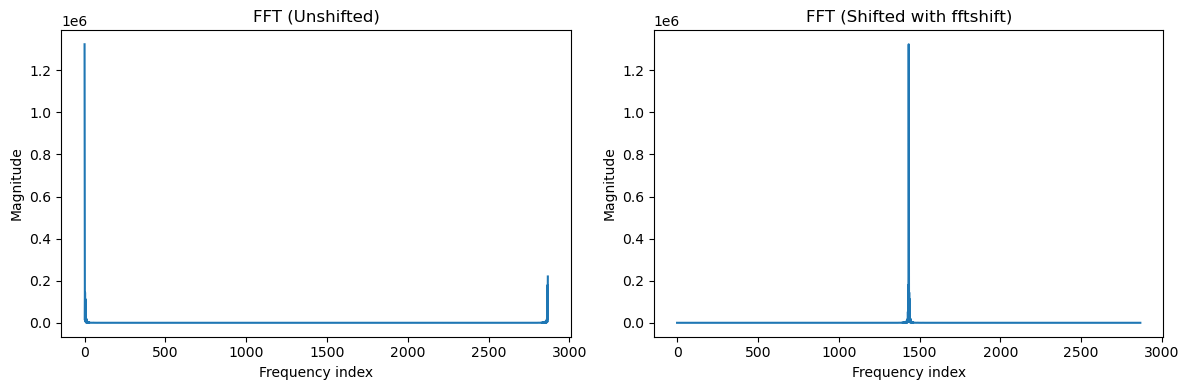

In [18]:
np_pts = contours[0].shape[0]

if np_pts % 2 != 0:
    boundary = np.vstack([contours, contours[-1]])
    np_pts += 1

complex_boundary = contours[:, 0] + 1j * contours[:, 1]

fft_boundary = np.fft.fft(a=complex_boundary)
fft_boundary_shift = np.fft.fftshift(fft_boundary)

magnitude = np.abs(fft_boundary)
magnitude_centered = np.abs(fft_boundary_shift)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(magnitude)
plt.title("FFT (Unshifted)")
plt.xlabel("Frequency index")
plt.ylabel("Magnitude")

plt.subplot(1,2,2)
plt.plot(magnitude_centered)
plt.title("FFT (Shifted with fftshift)")
plt.xlabel("Frequency index")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

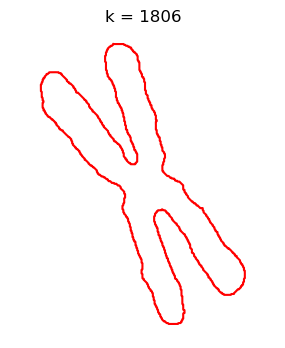

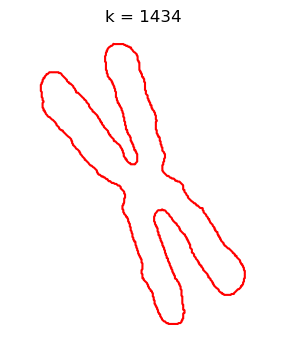

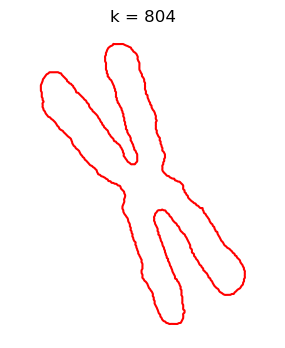

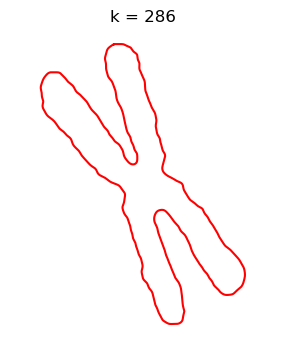

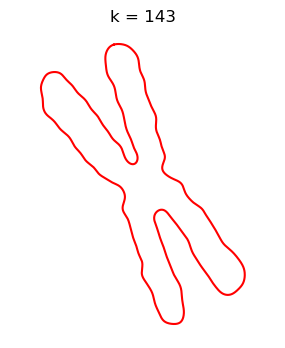

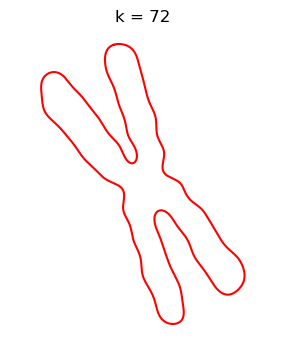

In [19]:
nums = [1806, 1434, 804, 286, 143, 72]

for i, num in enumerate(nums):
    fft_copy = np.zeros_like(fft_boundary)

    fft_copy[:num//2] = fft_boundary[:num//2]
    fft_copy[-num//2:] = fft_boundary[-num//2:] 
    approx_ifft = np.fft.ifft(fft_copy)

    real_approx = np.real(approx_ifft)
    imag_approx = np.imag(approx_ifft)

    approx = np.vstack([real_approx, imag_approx]).T
    
    plt.figure(figsize=(24, 4))
    plt.subplot(1,len(nums),i+1)
    plt.plot(approx[:,1], -approx[:,0], 'r-')
    plt.title(f"k = {num}")
    plt.axis('equal')
    plt.axis('off')